In [1]:
import numpy as np 
import pandas as pd 
import cv2 # image and video processing library to be used for reading and resizing our images

import matplotlib.pyplot as plt
%matplotlib inline 

import random # to split and shuffle our dataset
import gc # garbage collector for cleaning deleted data from memory

# Input data files are available in the "../input/" directory.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2562.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11848.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2864.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1441.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11107.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7320.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8756.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9239.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6797.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10435.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6148.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2051.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10711.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/4990.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-ed

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11467.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10491.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7237.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/622.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/4977.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9998.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/194.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11855.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/3670.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9411.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8709.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5856.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5654.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6282.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1917.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2374.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2068.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11757.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1066.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1504.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11140.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1509.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1174.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9125.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/3447.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/4106.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10317.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6315.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/889.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10101.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/tes

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9663.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2098.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/291.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8390.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8275.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9384.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/178.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10880.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/3455.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7201.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/4269.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8328.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8320.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9870.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8316.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/21

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6417.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/3414.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7725.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5609.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2554.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/3801.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5177.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6878.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10124.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/955.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/986.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/12453.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5842.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6673.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1443.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/3

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/628.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9292.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11340.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6091.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8346.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6648.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/8203.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5495.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5740.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10762.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1121.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6473.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2449.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/730.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2809.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2090.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7959.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/12351.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6726.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2999.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6474.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2232.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/3596.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7392.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1756.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11022.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/6892.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/32.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7322.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5024.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/209.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10404.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5903.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7176.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/5784.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/9527.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7117.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10607.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2973.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/10092.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/1205.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/7735.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/12393.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/2861.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/11656.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/te

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7103.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/1417.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4225.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/3869.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/11467.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10491.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7237.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/622.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4977.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9998.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/194.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/11855.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/3670.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9411.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-editio

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10670.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/53.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/11023.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9037.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/313.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9322.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/8085.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/6517.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/8776.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/11928.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/5115.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/11961.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/12246.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/6528.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-editi

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9623.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/2891.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4988.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4917.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10713.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/5890.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7079.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9649.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/5002.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4590.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/151.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9563.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/3050.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/6638.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/12451.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9013.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/1242.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4190.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/6784.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/6097.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/2568.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/1719.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/3958.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/1326.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4996.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/8745.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/11312.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10811.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edit

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/12274.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/769.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10524.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/1060.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/5252.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10886.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10132.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/1659.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10191.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/8612.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7242.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/2874.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7131.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/11570.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-ed

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/6839.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4773.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/170.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4948.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/2090.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7959.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/12351.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/6726.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/2999.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/6474.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/2232.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/3596.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7392.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/1756.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition

/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/8722.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/4379.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/2281.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9747.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/209.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10404.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/5903.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7176.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/5784.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/9527.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/7117.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10607.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/2973.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test/test/10092.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-editi

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6958.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2117.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.9866.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5213.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.4370.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.9865.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1071.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.8160.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.2394.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.9379.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.12166.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6102.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.8912.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1892.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-editio

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3467.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.12269.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3348.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1245.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6536.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4924.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.304.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.3234.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5334.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1061.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6282.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.2139.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.7943.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1460.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6338.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.8249.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.571.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.9446.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.12413.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5927.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.2730.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.11187.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4820.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2214.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.667.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.8217.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7929.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7200.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.8602.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6291.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.5134.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.3230.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2576.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.8660.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6115.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.11637.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7349.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.10538.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1534.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5945.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6195.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.3463.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-editi

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.9479.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.12452.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6444.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.8310.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6386.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.10482.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.11985.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4941.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6902.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3774.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.902.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3612.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6503.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.9008.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-editi

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.7664.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.3928.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4949.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.10871.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1302.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4025.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.495.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.3937.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.264.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.5769.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3696.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.10684.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.9697.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.8588.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.7637.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.12393.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.4542.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.8996.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.9465.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6034.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5288.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.2204.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6179.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.2837.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6450.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.7368.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.166.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1665.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.11021.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.8820.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.10773.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7920.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.11305.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.2058.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.5305.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2282.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.9710.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.7886.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1446.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4533.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7579.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.10212.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edi

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.12312.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.10819.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4535.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7601.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.9972.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5596.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.8460.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4632.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6506.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.11032.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6494.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5672.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.8144.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3984.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edit

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3731.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.12334.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3667.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2389.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4538.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.10283.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.10881.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.8791.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5751.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6084.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5338.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.7231.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6085.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.5966.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edit

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6838.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.3257.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7326.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.12067.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.9760.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2623.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.741.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.8038.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4441.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.2577.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.9615.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.3563.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.9741.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2265.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6687.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.11315.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.9979.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2251.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.3445.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7611.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.10997.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.6017.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.2117.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.12209.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.8998.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1942.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1490.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.4622.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edit

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.11529.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1318.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.417.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.1273.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.992.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.278.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.1363.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.5658.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.695.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.2953.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/cat.4883.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.9831.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.6884.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/dog.7249.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/tr

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.859.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.3197.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.4298.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.673.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.810.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5968.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.3618.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6958.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.2117.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9866.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.5213.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.4370.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.9865.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.6275.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11359.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11519.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9172.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.8297.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.12483.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.12005.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.7114.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.1042.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9483.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3111.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.9012.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.10235.jpg
/kaggle/input/dogs-vs-cats-redux-

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.4008.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5677.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.2998.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.9607.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.2462.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.7660.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6825.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6153.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.7813.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.5284.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.2164.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.7359.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.10619.jpg
/kaggle/input/dogs-vs-cats-redux-kern

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3204.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.7152.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.6168.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.7464.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9612.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11707.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.10320.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.862.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9216.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.667.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.7857.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.432.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.6098.jpg
/kaggle/input/dogs-vs-cats-redux-kernel

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5830.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.220.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.4903.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.12358.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3480.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.389.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6029.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.4672.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.6226.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.1460.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.10254.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.1063.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11623.jpg
/kaggle/input/dogs-vs-cats-redux-kern

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11745.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.4308.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.10503.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.7099.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.919.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.520.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3492.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.367.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.2895.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.1296.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.3480.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.5275.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.5333.jpg
/kaggle/input/dogs-vs-cats-redux-kernel

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.691.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.4041.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6598.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.12239.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.4342.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5386.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6603.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.4592.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11430.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.3964.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.5414.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.1233.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3855.jpg
/kaggle/input/dogs-vs-cats-redux-kern

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.10114.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.12262.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11191.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.8954.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.8747.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.824.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11126.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.6564.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5377.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.8193.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.6952.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11627.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.2023.jpg
/kaggle/input/dogs-vs-cats-redux-k

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5858.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.2714.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.9451.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.7092.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.8689.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9981.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.338.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.12312.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.10819.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.4535.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.7601.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9972.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.5596.jpg
/kaggle/input/dogs-vs-cats-redux-kern

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6703.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5334.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.11292.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.9046.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.11813.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.3299.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.8861.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3731.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.12334.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3667.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.2389.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.4538.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.10283.jpg
/kaggle/input/dogs-vs-cats-redux-k

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.10361.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.2804.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5223.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.1370.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.506.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3248.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.2020.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.6838.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3257.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.7326.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.12067.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.9760.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.2623.jpg
/kaggle/input/dogs-vs-cats-redux-kern

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.1644.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.5623.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.2935.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9183.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.6277.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6835.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.7191.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.6687.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11315.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.9979.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.2251.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.3445.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.7611.jpg
/kaggle/input/dogs-vs-cats-redux-kern

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.8327.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.1023.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.564.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.9178.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3857.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.3139.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.8821.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.11529.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.1318.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.417.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.1273.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/cat.992.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train/train/dog.278.jpg
/kaggle/input/dogs-vs-cats-redux-kernels-

In [2]:
# create a file path to our train and test data
train_dir = '../input/dogs-vs-cats-redux-kernels-edition/train'
test_dir = '../input/dogs-vs-cats-redux-kernels-edition/test'

In [3]:
# list comprehension to get all the images in the train data zip file
# and retrieve all images with dog/cat in their name
train_dogs = ['../input/dogs-vs-cats-redux-kernels-edition/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] # get dog images
train_cats = ['../input/dogs-vs-cats-redux-kernels-edition/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i] # get cat images

test_imgs = ['../input/dogs-vs-cats-redux-kernels-edition/test/{}'.format(i) for i in os.listdir(test_dir)] # get test images

In [4]:
train_imgs = train_dogs[:2000] + train_cats[:2000] # grab the images from train_dogs and train_cats and concatenate them

In [5]:
random.shuffle(train_imgs) #shuffle the training images so they aren't ordered by first half dogs and second half cats

In [6]:
# now that we have train_imgs, we don't need train_dogs and train_cats so we get rid of them so we don't run out of 
# memory when training our model
del train_dogs
del train_cats
gc.collect()

15

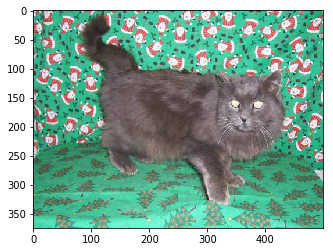

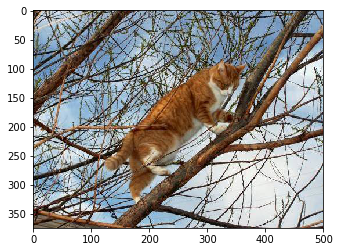

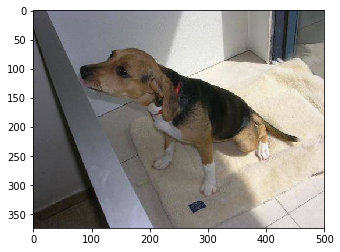

In [7]:
# lets view some images in train_imgs
import matplotlib.image as mpimg #import an image plotting module from matplotlib
for ima in train_imgs[0:3]: # run a for loop to plot the first three images in train_imgs
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

The images above are not the same dimensions so we need to resize them to all the same. 
Lets declare the new dimensions to be 150 x 150 for height and width and 3 channels (for colour).

In [8]:
# resize the images using the cv2 module
nrows = 150
ncolumns = 150
channels = 3

In [9]:
# function to read and resize the images
def read_and_process_image(list_of_images):
    '''
    Returns two arrays:
    X is an array of resized images
    y is an array of labels
    '''
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        # read the image
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))

        # get the labels
        if 'dog' in image[-13:-1]:
            y.append(1)
        elif 'cat' in image[-13:-1]:
            y.append(0)
        
    return X, y

In [10]:
# call the function
X, y = read_and_process_image(train_imgs)

X is now an array of image pixel values and y is a list of labels. 

In [11]:
# preview of the first image and label
X[0]

array([[[120,  93, 114],
        [184, 176, 233],
        [105,  98, 198],
        ...,
        [116, 157,  53],
        [126, 173,  55],
        [164, 196, 119]],

       [[184, 174, 154],
        [191, 186, 228],
        [ 96,  85, 186],
        ...,
        [125, 157,  50],
        [117, 164,  34],
        [120, 152,  60]],

       [[228, 213, 218],
        [148, 144, 175],
        [ 94,  97, 132],
        ...,
        [132, 170,  40],
        [111, 162,  31],
        [118, 166,  48]],

       ...,

       [[169, 214,  76],
        [164, 209,  69],
        [164, 211,  67],
        ...,
        [145, 188,  65],
        [143, 186,  55],
        [145, 188,  61]],

       [[165, 208,  73],
        [164, 210,  68],
        [164, 211,  65],
        ...,
        [146, 188,  63],
        [154, 198,  68],
        [152, 195,  68]],

       [[168, 211,  76],
        [166, 211,  70],
        [166, 213,  67],
        ...,
        [142, 184,  59],
        [149, 193,  63],
        [146, 189,  62]]

In [12]:
y[0:5]

[0, 0, 1, 1, 0]

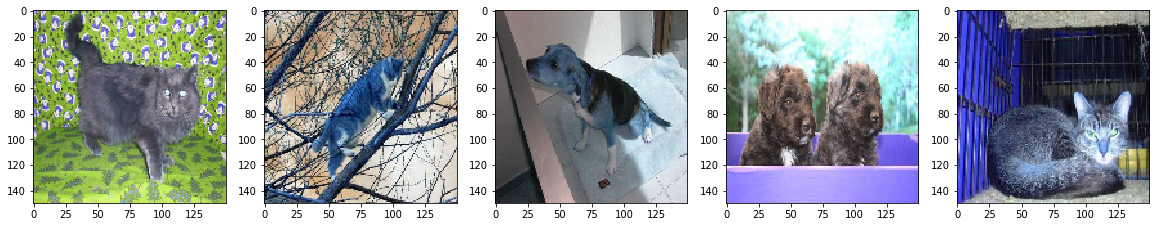

In [13]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns + 1, columns, i+1)
    plt.imshow(X[i])

Text(0.5, 1.0, 'Labels for Cats and Dogs')

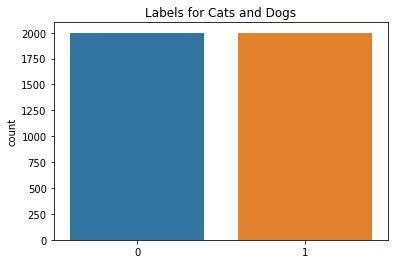

In [14]:
import seaborn as sns
del train_imgs # delete train_imgs since it has already been converted to an array and saved in X
gc.collect()

# convert list to numpy array to use in our model as X and y are currently a python array list
X = np.array(X)
y = np.array(y)

# lets make sure our labels contain the correct number of images
sns.countplot(y)
plt.title('Labels for Cats and Dogs')

In [15]:
# check shape of data
print('Shape of train images is:', X.shape)
print('Shape of labels is:', y.shape)

Shape of train images is: (4000, 150, 150, 3)
Shape of labels is: (4000,)


This matches our previous heght, width, and channels.

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2) 
# test_size =0.2 means we set 20% of the data to be assigned to the validation set, 
# and 80% to the train set

In [17]:
print('Shape of train images is:', X_train.shape)
print('Shape of test images is:', X_val.shape)
print('Shape of labels is:', y_train.shape)
print('Shape of labels is:', y_val.shape)

Shape of train images is: (3200, 150, 150, 3)
Shape of test images is: (800, 150, 150, 3)
Shape of labels is: (3200,)
Shape of labels is: (800,)


In [18]:
del X
del y
gc.collect()

10

In [19]:
# get the length of the train and validation data
ntrain = len(X_train)
ntest = len(X_val)

batch_size = 32

## Create Model

Using convolutional neual network

In [20]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


## Network Architecture

Using VGGnet to arrange our convolution layers

In [21]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## Compile The Model

In [23]:
# we'll use the RMSprop optimizer with a learning rate of 0.0001
# we'll use binary_crossentropy loss because its a binary classification
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Image Data Generator

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
# with the ImageDataGenerator complete, pass the train and validation set
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [26]:
# training the model
history = model.fit_generator(train_generator,
                             steps_per_epoch=ntrain // batch_size,
                             epochs = 64,
                             validation_data=val_generator,
                             validation_steps=ntest // batch_size)

Epoch 1/64
100/100 [==============================] - 18s 181ms/step - loss: 0.6920 - acc: 0.5247 - val_loss: 0.6676 - val_acc: 0.5562
Epoch 2/64
100/100 [==============================] - 15s 152ms/step - loss: 0.6800 - acc: 0.5678 - val_loss: 0.6585 - val_acc: 0.5813
Epoch 3/64
100/100 [==============================] - 15s 152ms/step - loss: 0.6640 - acc: 0.5866 - val_loss: 0.6112 - val_acc: 0.5775
Epoch 4/64
100/100 [==============================] - 15s 151ms/step - loss: 0.6564 - acc: 0.6062 - val_loss: 0.7552 - val_acc: 0.6175
Epoch 5/64
100/100 [==============================] - 15s 151ms/step - loss: 0.6429 - acc: 0.6172 - val_loss: 0.5005 - val_acc: 0.6463
Epoch 6/64
100/100 [==============================] - 15s 149ms/step - loss: 0.6214 - acc: 0.6434 - val_loss: 0.6049 - val_acc: 0.6500
Epoch 7/64
100/100 [==============================] - 15s 149ms/step - loss: 0.6151 - acc: 0.6494 - val_loss: 0.5419 - val_acc: 0.6925
Epoch 8/64
100/100 [==============================] - 1

After 64 epochs, the accuracy is about 83%

In [27]:
# save the model for use next time without training again
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

Now lets test our model on the test images

In [28]:
# prediction on the first ten images of the test dataset
X_test, y_test = read_and_process_image(test_imgs[0:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

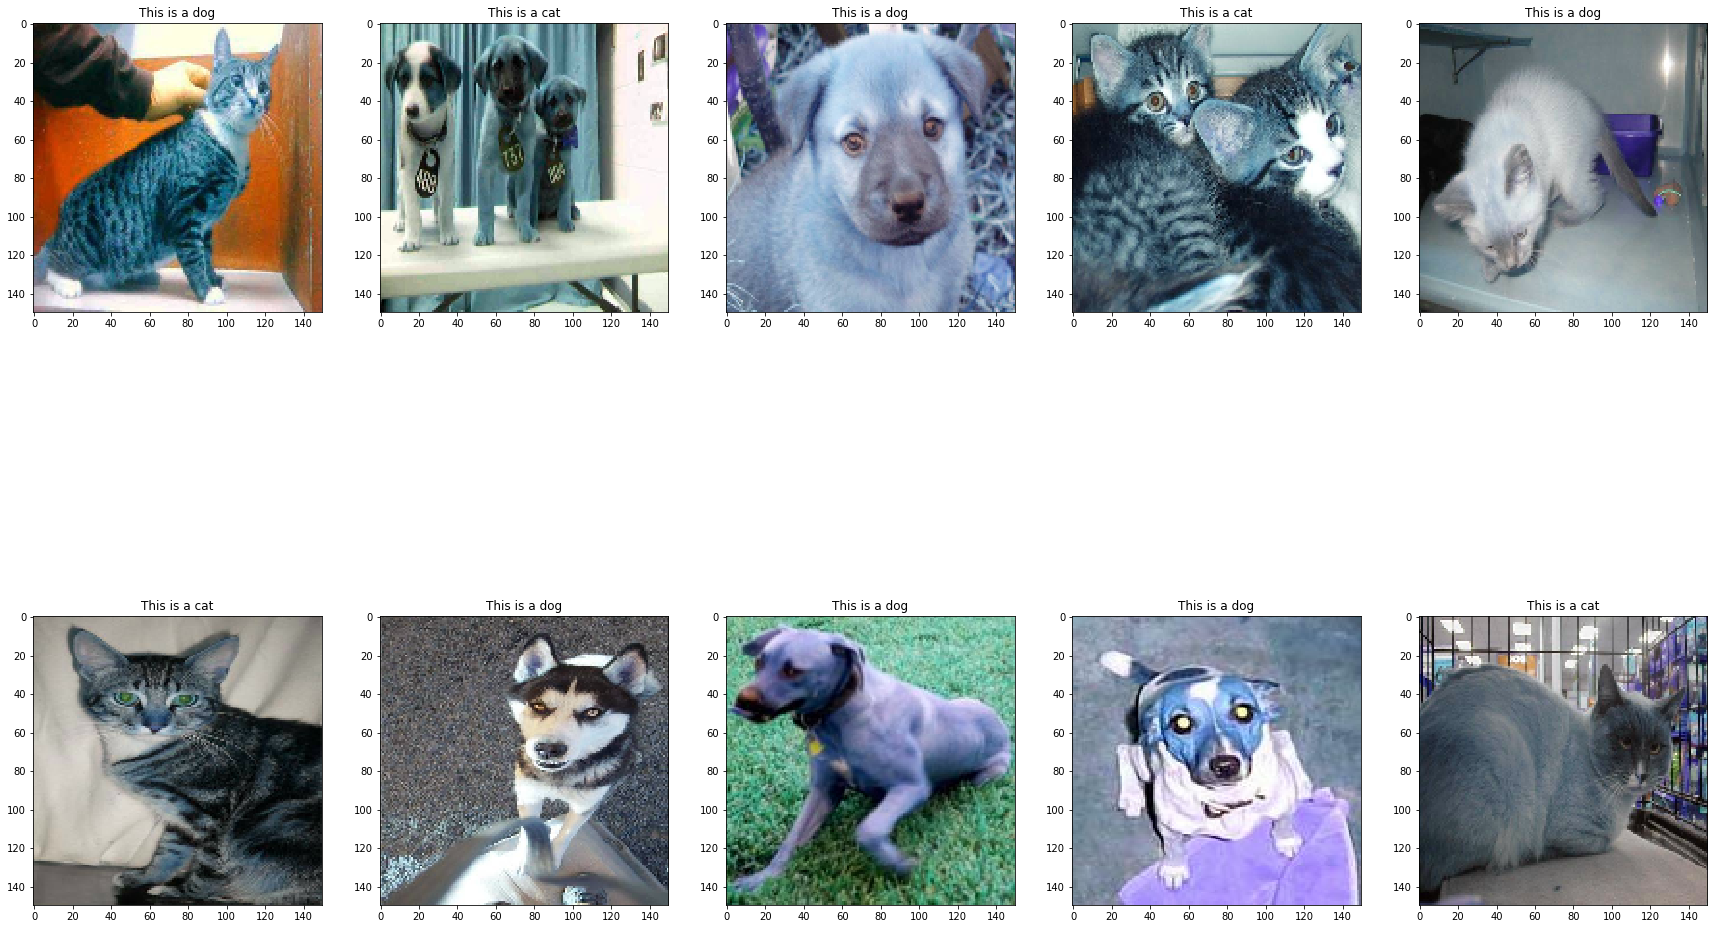

In [29]:
i = 0
text_labels = [] # create a list to hold the labels we will generate
plt.figure(figsize=(30,20)) # figure size of the images we will plot
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch) # make a prediction on the image 
    if pred > 0.5: # if prediction is > 0.5 it should be a dog, so append 'dog'
        text_labels.append('dog')
    else: # otherwise, it should be a cat
        text_labels.append('cat')
    plt.subplot(5 / columns + 1, columns, i + 1) # subplot to plot multiple images
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i+=1
    if i % 10 == 0:
        break
plt.show()